In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

/tmp/ipykernel_6902/2293527265.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dir = "top500"
hpcs = pd.DataFrame(columns=['Year', 'Computer', 'Energy Efficiency [GFlops/Watts]'])
for filename in sorted(os.listdir(dir)): 
    if 'TOP500' not in filename:
        continue
        
    df = pd.read_excel(os.path.join(dir, filename))

    #uniformize
    if 'Power Effeciency [GFlops/Watts]' in df.columns:
        df = df.rename(columns={'Power Effeciency [GFlops/Watts]': 'Energy Efficiency [GFlops/Watts]'})
        print(filename, ' -> change power to energy')

    elif 'Power Efficiency [GFlops/Watts]' in df.columns:
        df = df.rename(columns={'Power Efficiency [GFlops/Watts]': 'Energy Efficiency [GFlops/Watts]'})
        print(filename, ' -> change power to energy')

    elif 'Mflops/Watt' in df.columns:
        df = df.rename(columns={'Mflops/Watt': 'Energy Efficiency [GFlops/Watts]'})
        df['Energy Efficiency [GFlops/Watts]'] /= 1000.0
        print(filename, ' -> change mflops to energy')

    elif "Power" in df.columns and "RMax" in df.columns:
        df['Energy Efficiency [GFlops/Watts]'] = df['RMax'] / df['Power'] / 1000.0
        print(filename, ' -> manually compute efficiency')

    #concatenate
    if 'Energy Efficiency [GFlops/Watts]' in df.columns:
        hpcs = pd.concat([df[['Year', 'Computer', 'Energy Efficiency [GFlops/Watts]']], hpcs]).drop_duplicates('Computer').reset_index(drop=True)
        print(filename, ' -> parsed')
    else: 
        print(filename, " not parsed")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
TOP500_199311.xls  not parsed
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
TOP500_199411.xls  not parsed
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
TOP500_199511.xls  not parsed
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
TOP500_199611.xls  not parsed
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
TOP500_199711.xls  not parsed
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
TOP500_199811.xls  not parsed
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
TOP500_199911.xls  not parsed
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
TOP500_200011.xls  not parsed
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
TOP500_200111.xls  not parsed
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


/tmp/ipykernel_6902/1111351260.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hpcs = pd.concat([df[['Year', 'Computer', 'Energy Efficiency [GFlops/Watts]']], hpcs]).drop_duplicates('Computer').reset_index(drop=True)


TOP500_201411.xls  -> change mflops to energy
TOP500_201411.xls  -> parsed
TOP500_201511.xls  -> change mflops to energy
TOP500_201511.xls  -> parsed
TOP500_201611.xls  -> change mflops to energy
TOP500_201611.xls  -> parsed
TOP500_201711.xls  -> change power to energy
TOP500_201711.xls  -> parsed
TOP500_201811.xls  -> change power to energy
TOP500_201811.xls  -> parsed
TOP500_201911.xls  -> change power to energy
TOP500_201911.xls  -> parsed
TOP500_202011.xlsx  -> change power to energy
TOP500_202011.xlsx  -> parsed
TOP500_202111.xlsx  -> change power to energy
TOP500_202111.xlsx  -> parsed
TOP500_202211.xlsx  -> parsed
TOP500_202311.xlsx  -> parsed


In [3]:
hpcs = hpcs.replace([np.inf, -np.inf], np.nan).dropna()
hpcs['Energy Efficiency [GFlops/Watts]'].describe()

/tmp/ipykernel_6902/2432195375.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hpcs = hpcs.replace([np.inf, -np.inf], np.nan).dropna()


count    897.000000
mean       3.374089
std        7.056150
min        0.011206
25%        0.286740
50%        0.995520
75%        2.979570
max       65.395961
Name: Energy Efficiency [GFlops/Watts], dtype: float64

     Energy Efficiency [GFlops/Watts]          
                                 mean       std
Year                                           
2002                         0.011206       NaN
2005                         0.203770       NaN
2006                         0.038030       NaN
2007                         0.076836  0.051947
2008                         0.161970  0.114310


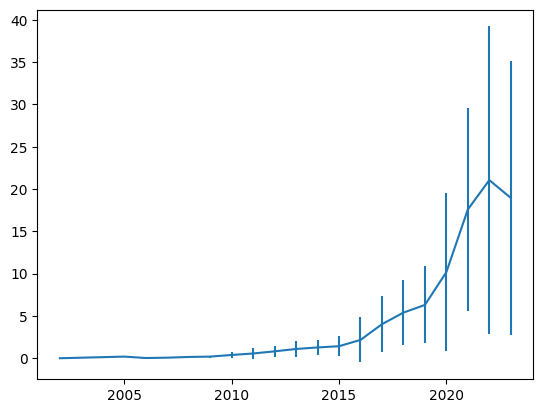

In [15]:
stats = hpcs[['Year', 'Energy Efficiency [GFlops/Watts]']].groupby('Year').agg(['mean', 'std'])
print(stats.head())
plt.errorbar(stats.index, stats['Energy Efficiency [GFlops/Watts]']['mean'], stats['Energy Efficiency [GFlops/Watts]']['std'])
stats.to_csv('Energy efficiency.csv')